In [1]:
%pylab inline

import pandas as pd
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


Here we have a combined table from the data of 
Hip fractions:

    Cauley, J.A., et al., Geographic and ethnic disparities in osteoporotic fractures. Nat Rev Endocrinol, 2014. 10(6): p. 338-51.


Latitudes of the countries often the capital adn omitted for very large countries
    http://www.csgnetwork.com/
Temperature:

    The World bank (databank.worldbank.org)
    
Vitamin D:

    Wahl, D. A. et al. A global representation of vitamin D status in healthy populations. Arch. Osteoporos. 7, 155–172 (2012). doi: 10.1007/s11657-012-0093-0


Calcium intake:

    Balk, E. M. et al. Global dietary calcium intake among adults: a systematic review. Osteoporosis International 28, 3315–3324 (2017). doi:10.1007/s00198-017-4230-x



In [2]:
D= pd.read_excel('../data/Data_for_correlations.xlsx',index_col=0)


In [3]:
# Have a look at the missing values
D.loc[D.isnull().any(1)]

,Continent,Men,Women,Total,Temperature,Latitude,VitaminD,Calcium
Country,,,,,,,,
Nigeria,Africa,2,2,2.0,32.8,9.0,NaN,636.0
Hong Kong,Asia,149,324,230.0,26.0,NaN,NaN,NaN
Indonesia,Asia,59,173,119.0,30.6,6.0,NaN,342.0
Japan,Asia,165,266,218.0,15.3,NaN,59.100000,533.0
Philippines,Asia,48,133,93.0,30.1,14.0,NaN,440.0
Russia,Asia,191,257,219.0,-0.1,NaN,29.100000,788.0
Singapore,Asia,156,331,248.0,30.3,NaN,NaN,794.0
South Korea,Asia,149,327,231.0,11.1,NaN,46.100000,483.0
Taiwan,Asia,186,355,264.0,NaN,NaN,76.500000,587.0


In [4]:
Labels={
    'Temperature':'Average day temperature [°C]',
    'Total': 'Age-standardized Incidence\nof Hip Fracture (per 100,000)',
    'Latitude':'Latitude [°]',
    'Women':'age-standardized incidence\nof hip fracture in women (per 100,000)',
    'VitaminD': 'Average serum vitamin D levels\n[25(OH)D (nmol/L)]',
    'Calcium': 'Average dietary calcium intake [mg/d]',
    
}

In [5]:
D.columns

Index(['Continent', 'Men', 'Women', 'Total', 'Temperature', 'Latitude',
       'VitaminD', 'Calcium'],
      dtype='object')

In [6]:
%run scripts.py
plotting_Setup()

In [8]:
# Define function for correlation

from scipy.stats import pearsonr
import shutil
import statsmodels.api as sm


save_plot_params=dict(formats=['.pdf'])

def add_stats(x,y,ax):

    corelation= pearsonr(x,y)

    sign= "r={0:.2f}, p={1:.2g}".format(*corelation)

    legend_args=dict(fontsize=12, verticalalignment='center', transform=ax.transAxes)
    
    if corelation[0]<0:
    
        ax.text(0.1,0.1,sign,horizontalalignment='left',**legend_args)
    else:
        ax.text(0.9,0.1,sign,horizontalalignment='right',**legend_args)
    

def cor_plot(var1='Temperature',var2='Total'):

    f= plt.figure(figsize=(5,5))

    df=D[[var1,var2]].dropna()

    ax=sns.regplot(y=var1,x=var2,data=df)
    
    add_stats(df[var1],df[var2],ax)

    ax.set_ylabel(Labels[var1])
    ax.set_xlabel(Labels[var2])
    

    figure_name=f"{var1}_vs_{var2}"
    saveplot(figure_name,**save_plot_params)

    
    
def partial_corr(x,y,other,labels=None):
    
    data= D.loc[~D[[x,y,other]].isnull().any(1)]
    
    print(f"use the data for {data.shape[0]} countries")

    _,residuals = sm.graphics.plot_partregress( x,y,other, ret_coords=True,
                                                   obs_labels=False,data=data)

    f= plt.figure(figsize=(5,5))

    ax=sns.regplot(*residuals)

    add_stats(*residuals,ax)
    
    if labels is None:
        labels=(x,y,other)

    ax.set_xlabel(f'e({labels[0]} | {labels[2]})')
    ax.set_ylabel(f'e({labels[1]} | {labels[2]})')
    
    saveplot(f"partcorr_{x}_vs_{y}_corrected_{other}",**save_plot_params)

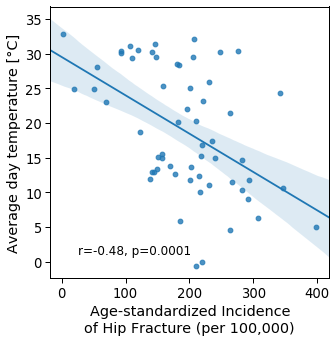

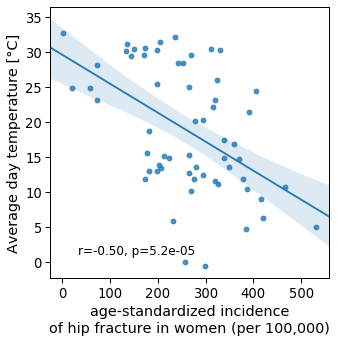

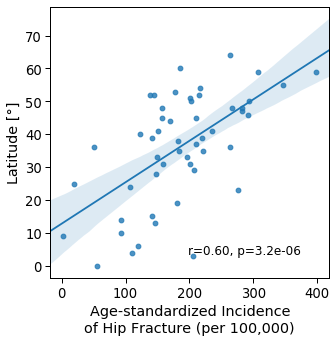

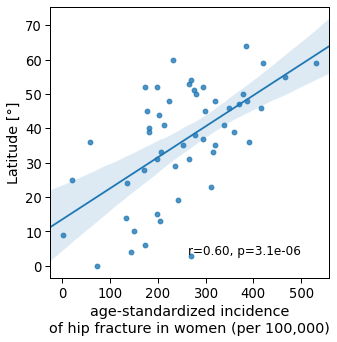

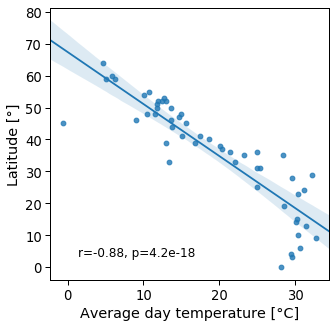

In [9]:
cor_plot(var1='Temperature',var2='Total')
cor_plot(var1='Temperature',var2='Women')
cor_plot(var1='Latitude',var2='Total')
cor_plot(var1='Latitude',var2='Women')
cor_plot(var1='Latitude',var2='Temperature')


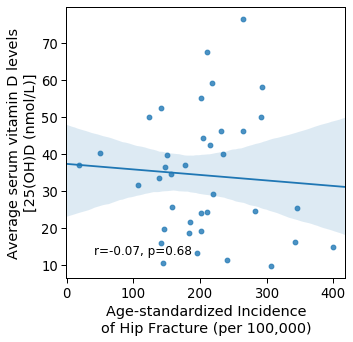

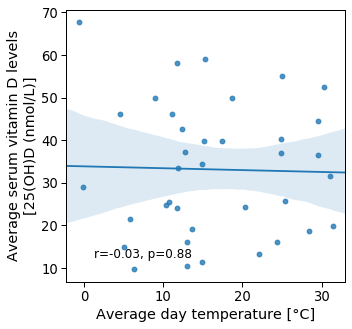

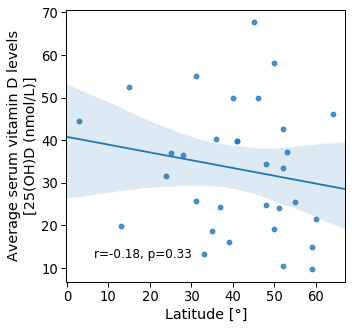

In [10]:
cor_plot(var1='VitaminD',var2='Total')
cor_plot(var1='VitaminD',var2='Temperature')
cor_plot(var1='VitaminD',var2='Latitude')






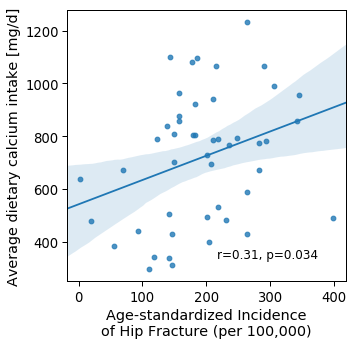

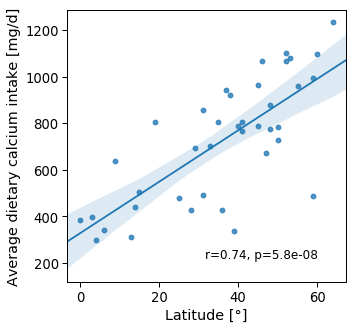

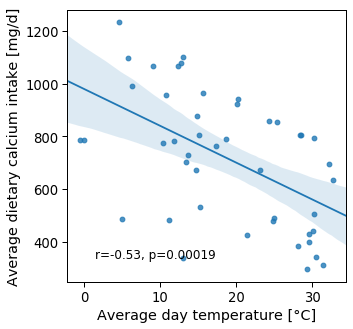

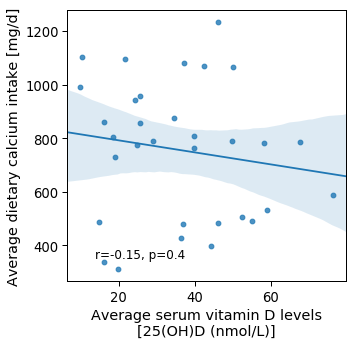

In [11]:
cor_plot(var1='Calcium',var2='Total')
cor_plot(var1='Calcium',var2='Latitude')
cor_plot(var1='Calcium',var2='Temperature')
cor_plot(var1='Calcium',var2='VitaminD')

use the data for 37 countries


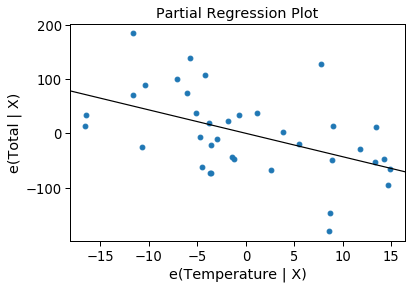

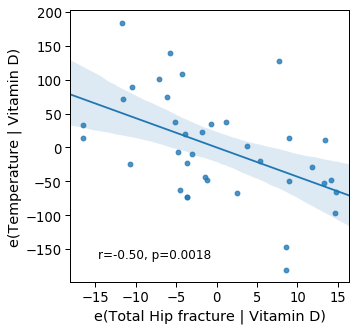

In [12]:
partial_corr("Total","Temperature", "VitaminD",
             labels=('Total Hip fracture','Temperature','Vitamin D'))

use the data for 45 countries


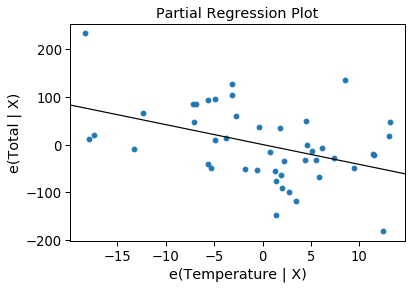

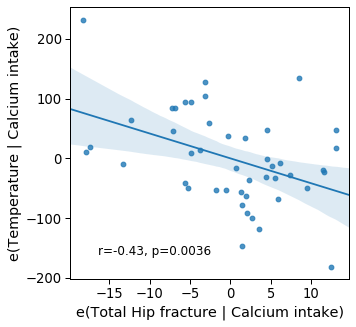

In [13]:
partial_corr("Total","Temperature", "Calcium",
             labels=('Total Hip fracture','Temperature','Calcium intake'))

use the data for 39 countries


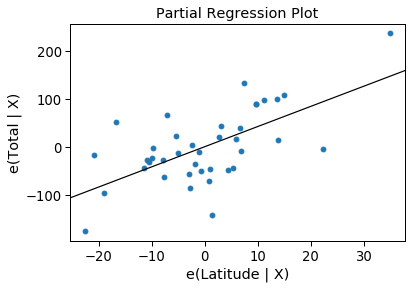

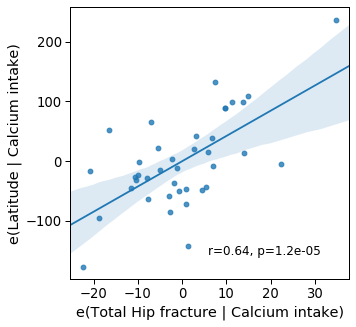

In [14]:
partial_corr("Total","Latitude", "Calcium",
             labels=('Total Hip fracture','Latitude','Calcium intake'))

use the data for 51 countries


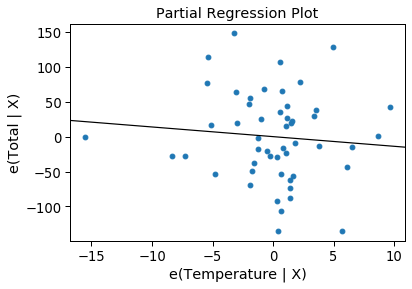

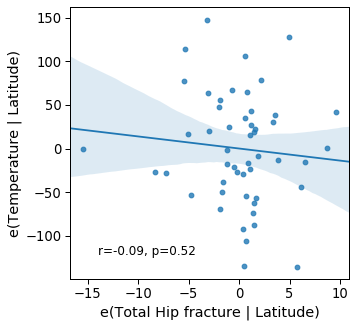

In [15]:
partial_corr("Total","Temperature", "Latitude",
             labels=('Total Hip fracture','Temperature','Latitude'))

use the data for 39 countries


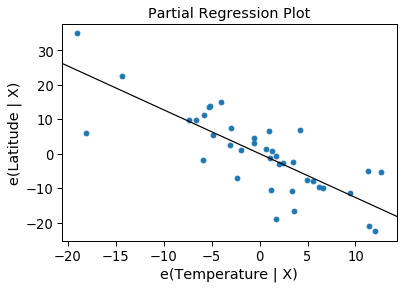

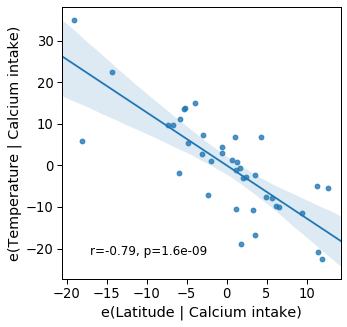

In [16]:
partial_corr("Latitude","Temperature", "Calcium",
             labels=('Latitude','Temperature','Calcium intake'))

# Regression 

In [17]:


from statsmodels.formula.api import ols

## Simple model with only temperature

In [18]:
model_temp = ols("Total ~ Temperature", data=D).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     17.50
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           0.000100
Time:                        13:30:18   Log-Likelihood:                -333.27
No. Observations:                  59   AIC:                             670.5
Df Residuals:                      57   BIC:                             674.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     271.8238     21.297     12.764      0.000     229.178     314.470
Temperature    -4.2487      1.016     -4.183      0.000      -6.282      -2.215
==============================================================================
Omnibus:                        0.611   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.644
Skew:                           0.228   Prob(JB):                        0.725
Kurtosis:                       2.768   Cond. No.                         49.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multivariade model

In [19]:
# Take data with no missing values
data= D.loc[~D[['Temperature','Calcium','Total','Latitude']].isnull().any(1)]

In [20]:
model = ols("Total ~ Calcium + Temperature + Latitude", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     10.85
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           3.46e-05
Time:                        13:30:20   Log-Likelihood:                -214.25
No. Observations:                  39   AIC:                             436.5
Df Residuals:                      35   BIC:                             443.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     137.8086     83.482      1.651      0.108     -31.669     307.286
Calcium        -0.0990      0.058     -1.710      0.096      -0.217       0.019
Temperature    -0.8018      2.254     -0.356      0.724      -5.378       3.775
Latitude        3.8172      1.407      2.713      0.010       0.961       6.673
==============================================================================
Omnibus:                        0.257   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.385
Skew:                          -0.169   Prob(JB):                        0.825
Kurtosis:                       2.649   Cond. No.                     6.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Marginal model

In [21]:
data= D.loc[~D[['Temperature','Calcium','Total']].isnull().any(1)]

model = ols("Total ~ Calcium + Temperature", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     7.838
Date:                Fri, 19 Jun 2020   Prob (F-statistic):            0.00128
Time:                        13:30:22   Log-Likelihood:                -255.18
No. Observations:                  45   AIC:                             516.4
Df Residuals:                      42   BIC:                             521.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     250.0697     56.247      4.446      0.000     136.559     363.581
Calcium         0.0279      0.052      0.537      0.594      -0.077       0.132
Temperature    -4.1622      1.367     -3.046      0.004      -6.920      -1.404
==============================================================================
Omnibus:                        0.695   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.730
Skew:                           0.271   Prob(JB):                        0.694
Kurtosis:                       2.692   Cond. No.                     3.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
data= D.loc[~D[["Total", "Latitude", "VitaminD"]].isnull().any(1)]


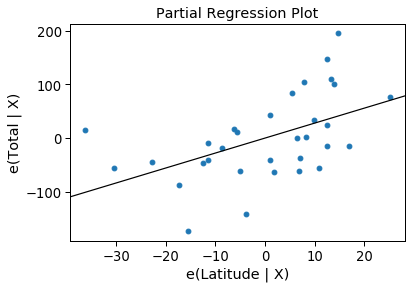

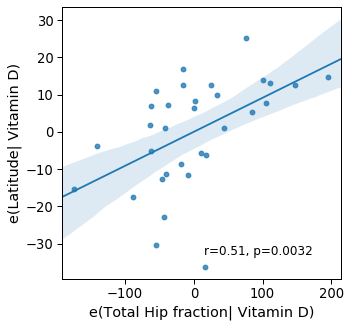

In [26]:
_,residuals = sm.graphics.plot_partregress("Total", "Latitude", "VitaminD" , ret_coords=True,
                                               obs_labels=False,data=data)

residuals = tuple(reversed(residuals)) # invert y and y to be conform to other plots

f= plt.figure(figsize=(5,5))

ax=sns.regplot(*residuals)

add_stats(*residuals,ax)

ax.set_xlabel('e(Total Hip fraction| Vitamin D)')
ax.set_ylabel('e(Latitude| Vitamin D)')


saveplot("partial_correlation_latitude_total",figurefolder='human_figures',formats=['.pdf'])